In [ ]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
path = str(Path.cwd().parent)
print(path)
sys.path.insert(1, path)

c:\Users\jaesc2\GitHub\skforecast


In [2]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

from skforecast.datasets import fetch_dataset
from skforecast.preprocessing import RollingFeatures
from skforecast.recursive import ForecasterRecursive

h2o
---
Monthly expenditure ($AUD) on corticosteroid drugs that the Australian health
system had between 1991 and 2008.
Hyndman R (2023). fpp3: Data for Forecasting: Principles and Practice(3rd
Edition). http://pkg.robjhyndman.com/fpp3package/,https://github.com/robjhyndman
/fpp3package, http://OTexts.com/fpp3.
Shape of the dataset: (204, 2)


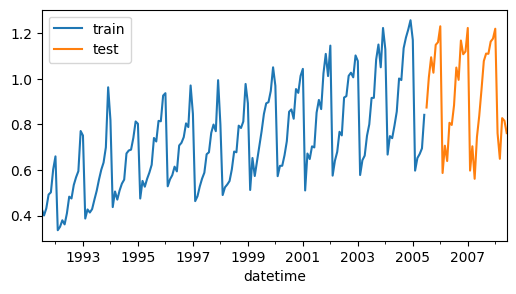

In [3]:
# Download data
# ==============================================================================
data = fetch_dataset(
    name="h2o", raw=True, kwargs_read_csv={"names": ["y", "datetime"], "header": 0}
)

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

In [13]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterRecursive(
                 regressor       = LGBMRegressor(random_state=123, verbose=-1),
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=10)
             )

forecaster.fit(y=data_train, store_in_sample_residuals=True)
forecaster

=================== 
ForecasterRecursive 
=================== 
Regressor: LGBMRegressor 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window features: ['roll_mean_10'] 
Window size: 15 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: 
    {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0,
    'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1,
    'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0,
    'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None,
    'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0,
    'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1} 
fit_kwargs: {} 
Creation date: 2025-01-21 09:24:46 
Last fit date: 2025-01-21 09:24:46 
Skforecast version: 0.15.0 
Python version: 3.11.10 
Forecaster id: None

In [14]:
print(forecaster.in_sample_residuals_)

[-0.0835982  -0.03088309 -0.03572226 -0.03451363 -0.03253101 -0.00447066
 -0.01768219  0.01621256 -0.00865258  0.02685241  0.01129969  0.02016058
 -0.03447846 -0.03152741  0.02267455  0.01923856  0.01216878  0.00988952
  0.01751258 -0.00378717  0.01755834 -0.00136832  0.00408502  0.00699648
  0.00082665 -0.01086792  0.00464096  0.00372532  0.00092359  0.02358048
 -0.03679033  0.01297797  0.00077498  0.01888975  0.00580926  0.01427925
 -0.01045937 -0.02659416  0.0100631  -0.00658749  0.02797495 -0.00583965
  0.01961018 -0.02197698 -0.02676779  0.05834207  0.02171168 -0.00660622
 -0.01706374 -0.00288895 -0.02638357 -0.01308641  0.01366593 -0.00455284
 -0.02616876 -0.00044758 -0.01888648 -0.02374177  0.06838358 -0.08911642
 -0.00464606 -0.01657921 -0.02340127 -0.0226069   0.0106258  -0.00060052
  0.01621437 -0.02073869 -0.00894796 -0.03978995 -0.00094474  0.01472294
  0.01120942 -0.0183829   0.01689152 -0.04032094  0.03607686  0.01579758
 -0.01721245  0.03129046  0.03731016 -0.01906032  0

In [19]:
type(list(forecaster.in_sample_residuals_by_bin_.keys())[0])


int

In [7]:
d = {'10': 1}

if d is None or not d:
    print('hola')

In [9]:
forecaster.predict_interval(steps=5, use_binned_residuals=True)

ValueError: `forecaster.in_sample_residuals_by_bin_` is `None`. Use `store_in_sample_residuals = True` when fitting the forecaster to store in-sample residuals.

In [13]:
{} is None

False